In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
obs_groups = pd.read_csv("../data/EDD_table_v44+.csv")
sim_groups = pd.read_csv("../data/simul.MagK16.d5.d100.2D.v01.group.csv")

In [5]:
print("obs groups = {}".format(len(obs_groups)))
print("sim_groups = {}".format(len(sim_groups)))

obs groups = 15003
sim_groups = 60564


In [11]:
print(obs_groups.keys())
obs_groups[:2]

Index(['PGC', 'Name', 'RA', 'DE', 'GLong', 'GLat', 'SGL', 'SGB', 'Ty', 'B_t',
       'K_t', 'lgL_K', 'Vhel', 'Vls', 'D_i', 'eDi', 'PGC1', 'PGC1+', 'Ng',
       'gGLong', 'gGLat', 'gSGL', 'gSGB', 'gK_t', 'glgL_K', 'gVh', 'gVls',
       'gND', 'gD', 'geD', 'gsigL', 'gsigV', 'gR2t', 'gRdyn', 'gMassL',
       'gMassdyn'],
      dtype='object')


,PGC,Name,RA,DE,GLong,GLat,SGL,SGB,Ty,B_t,...,gVls,gND,gD,geD,gsigL,gsigV,gR2t,gRdyn,gMassL,gMassdyn
0,13418,NGC1399,54.6212,-35.4506,236.7163,-53.6356,262.5460,-42.0776,-4.6,10.35,...,1360,49,18.09,3,333,380,0.902,0.607,13.869,13.902
1,13179,NGC1365,53.4016,-36.1405,237.9564,-54.5979,261.8963,-40.9741,3.2,9.83,...,1360,49,18.09,3,333,380,0.902,0.607,13.869,13.902


In [12]:
print(sim_groups.keys())
sim_groups[:2]

Index(['ID', 'grpID', 'flag', 'ra', 'dec', 'MagK', 'Ks', 'logK', 'Vls', 'dist',
       'mDist', 'R_theta', 'sigmaP_dyn', 'sigmaP_lum', 'Mv_dyn', 'Mv_lum',
       'Rg_angular', 'Rg_dyn', 'R2t_dyn', 'R2t_lum', 'r2t_lum', '   tX_dyn',
       'tX_lum', 'No_Galaxies', 'nest'],
      dtype='object')


,ID,grpID,flag,ra,dec,MagK,Ks,logK,Vls,dist,...,Mv_lum,Rg_angular,Rg_dyn,R2t_dyn,R2t_lum,r2t_lum,tX_dyn,tX_lum,No_Galaxies,nest
0,901008182,-1,2,18.9204,-40.9972,-27.23,4.66,12.2031,1786,23.86,...,1.090000e+14,1.36,0.794,0.97,1.028,1.259,9.710000e+16,6.800000e+16,91,1008182
1,1008182,20,1,18.9120,-41.1345,-26.38,5.55,11.8641,1806,24.37,...,4.450000e+13,0.00,0.000,0.00,0.762,0.933,0.000000e+00,6.800000e+16,91,1008182


In [35]:
log_K_obs = obs_groups['lgL_K'][obs_groups['Vls']<2000]
log_K_sim = sim_groups['logK'][sim_groups['Vls']<2000]

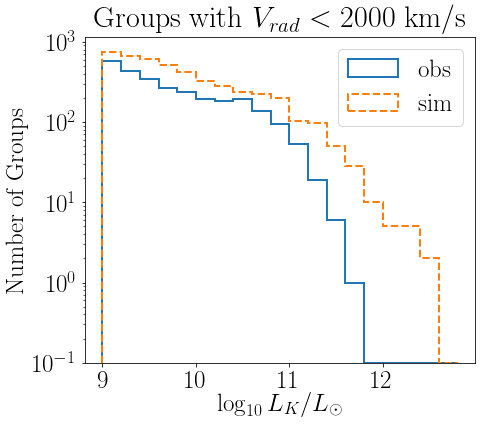

In [56]:
fig = plt.figure(1, figsize=(7,6))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=25)
a = plt.hist(log_K_obs, bins=np.arange(9.0, 13.0, 0.20), log=True, histtype='step', label='obs', linewidth=2)
a = plt.hist(log_K_sim, bins=np.arange(9.0, 13.0, 0.20), log=True, histtype='step', label='sim', linestyle='--', linewidth=2)
plt.legend()
plt.title("Groups with $V_{rad}<2000$ km/s")
plt.xlabel("$\log_{10} L_K/L_{\odot}$")
plt.ylabel("Number of Groups")